# Convolutional Neural Networks
----
----

Emerged from the study of the brain's visual cortex, and they have been used in image recognition since the 1980s.
- Image search services
- self-driving cars
- automatic video classification systems

Not restricted to visual perception: also successful at:
- voice regognition or natural language processing(NLP)

## The Architecture of the Visual Cortex
-----


## Convolutional Layer
-----

Neurons in the first convolutional layer are not connected to every single pixel in the input image, but only to pixels in their receptive fields. Each Neuron in the second convolutional layer is connected only to neurons located within a small rectangle of the first layer.

Allows network to concentrate on low-level features in the first hidden layer, then assemble them into higher-level features in the next hidden layer.

NB: Convolution: mathematical operation that slides one function over another and measures the integral of their pointwise multiplication. 

A neuron located in row _i_ column _j_ of a given layer is connected to the output of the neuron in the pevious layer located in rows _i_ to $i + f_h - 1$, columns _j_ to $ j + f_w -1$ where $f_h$ and $f_w$ are height and width of the receptive field.

Common to add zeros around the inputs. _zero padding_

Possible to connect large input layer to much smaller layer by spacing out the receptive fields. The distance between two consecutive receptive fields is called the _stride_

#### Filters

Neurons weight can be represented as a small image the sice of the receptive feild.

A layer full of neurons using the samel filter(covolutional kernel) gives a _feature map_, which highlights the aeras in an image that are most similar to the filter. A CNN finds most useful filters for its task, and it learns to combine into more complex patterns.

#### Stacking Multiple feature Maps
Convolutional latyer is composed of several feature maps of equal size, so its more accuratelly represented in 3D. Within a feature map all neurons share the same weights and bias terms(parameters), but different feature maps may have different parameters. Neurons receptive field extends across all previous layers' feature maps.

Convolutional layer simultaneously applies multiple filters to its inputs, making it capable of detecting multiple features anywhere in its input.

Input images are also composed of multiple sublayers: one per color chanel.

Neuron located in row i, column j of feature map k in a given convolutional layer l is connected to the outputs of the neuron in pervious layer l-1, located in rows $i x s_w$ to $i x s_w + f_w -1$ and columns $j x s_h$ to $j x s_h + f_h -1$, across all feature maps

#### Tensorflow Implementation
Each image typically represented as 3D tensor of shape [height, weight, channels], or mini-batch [min-batch size, height, weight, channel].
weights of convolutional layer 4D tensor [$f_h, f_w, f_n, f_{n'}$], bais term is 1D tensor [$f_n$]

In [1]:
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

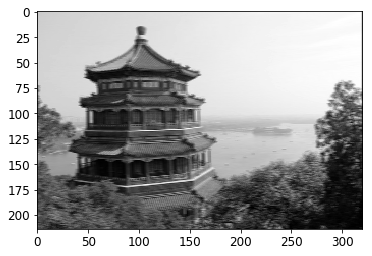

In [3]:
from sklearn.datasets import load_sample_image
import tensorflow as tf

# Load sample images
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape

# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

# Create a graph with input X plus a convolutional layer applying the 2 filters
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding="SAME")

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})

plt.imshow(output[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.show()

Convolutional layer have quite a few parameters:
- num of filters
- height
- width
- strides
- padding

use cross validation to find right hyperparameters like always

#### Memory Requirement
Require huge amount of RAM, especially during training, because the reverse pass of back prop requires all the intermediate values computed during the forward pass.

Everything computed during forward pass is needs to be preserved for the reverse pass, so the amount of RAM needed is at least the total amount of RAM required by all layers.

## Pooling Layer
-----

Their goal is to subsample the input image in order to reduce the computational load, the memory usage, and number of parameters.

Connected to the outputs of a limited number of neurons in the previous layer, located within a small rectangular receptive field. Define: size, stride, padding type. 

Pooling neurons have no weight; all it does is aggregate the inputs using an aggregation function such as max or mean.

In [5]:
reset_graph()
batch_size, height, width, channels = dataset.shape

filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

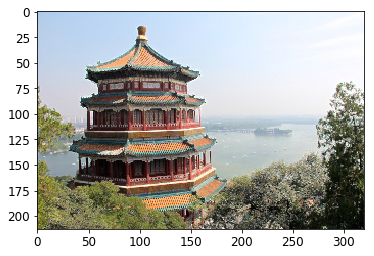

In [6]:
# create a graph with input X plus a max pool layer
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: dataset})
    
plt.imshow(output[0].astype(np.uint8))
plt.show()

## CNN Architectures
-----

Generally: input -> few convolutional layers -> pooling layer -> another few convolutional layers (+ReLU) -> another pooling layer -> so on -> until top of the stack is regular feedforward neural network(fully connected ReLU layers) -> final layer output prediction with softmax

#### [LeNet-5](http://yann.lecun.com/)

#### [AlexNet](http://goo.gl/mWRBRp)
won 2012 ImageNet ILSVRC challenge by large margin: achieved 17% top-5 error rate.

#### [GoogleNet](http://goo.gl/tCFzVz) 
won 2014 ILSVRC callenge by pushing top-5 error rate below 7%. Much deeper that the two previous networks.

Uses sub-networks called _inception modules_, which allows GoogleNet to use parameters much more efficiently than previous archetectures.

#### [ResNet](http://goo.gl/4puHU5)
Residual network. Winner 2015 ILSVRC, top-5 error rate 3.6%. Extremely deep CNN composed of 156 layers. Key to training such a deep network is to use skip connections: the signal feeding into a layer is also added to the output of a layer located a bit higher up the stack.

if you add the input x to the output of the network, then the network will be forced to model f(x) = h(x) - x rather than h(x). This is residual learning.

Network start making progress even if several layers have not started learning yet. Deep residual net can be seen as a stack of residual units, where each residual unit is a small neural net with a skip connection.

ResNet Architecture: starts and ends like googlenet, but in between is very deep stack of residual units. residual unit is composed of two convolutional layers, with batch normalization and ReLU.

## Exercises
----

1. Layers are not fully connected, and uses the same weight in that layer meaning it has fewer parameters, making it faster to train. When a filter(kernel) to detect a particular feature is learnedthe CNN can detect that feature anywhere on the image. CNN architecture embeds the prior knowledge of how pixels are origanized in an image.
2. 3x3x(RGB)3 + (bias) 1 =  28. First convolution layer 100 feature maps, 100 * 28 = 2800. Second Convolutional (3 x 3)(kernel) x 100(input feature map) + 1(bias) =  901, 200 feature maps 901 x 200 = 180200. Last layer: (3 x 3)(kernel) x 200 (input) + 1(bias) = 1801, feature maps 1801 * 400 = 720400. total = 903400.
3. 
	- reduce mini-batch size
	- removing layers
	- increasing stride
	- using 16bit instead of 32 bit floats
	- distribute computing over a network
4. pooling layer has no parameters
5. ?
6. 
7.   

In [13]:
height = 28
width = 28
channels = 1
n_inputs = height * width

conv1_fmaps = 32
conv1_ksize = 3
conv1_stride = 1
conv1_pad = "SAME"

conv2_fmaps = 64
conv2_ksize = 3
conv2_stride = 1
conv2_pad = "SAME"
conv2_dropout_rate = 0.25

pool3_fmaps = conv2_fmaps

n_fc1 = 128
fc1_dropout_rate = 0.5

n_outputs = 10

reset_graph()

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
    X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
    y = tf.placeholder(tf.int32, shape=[None], name="y")
    training = tf.placeholder_with_default(False, shape=[], name='training')

conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.relu, name="conv1")
conv2 = tf.layers.conv2d(conv1, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         strides=conv2_stride, padding=conv2_pad,
                         activation=tf.nn.relu, name="conv2")

with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps * 14 * 14])
    pool3_flat_drop = tf.layers.dropout(pool3_flat, conv2_dropout_rate, training=training)

with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat_drop, n_fc1, activation=tf.nn.relu, name="fc1")
    fc1_drop = tf.layers.dropout(fc1, fc1_dropout_rate, training=training)

with tf.name_scope("output"):
    logits = tf.layers.dense(fc1, n_outputs, name="output")
    Y_proba = tf.nn.softmax(logits, name="Y_proba")

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

In [10]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data")

Extracting /tmp/data/train-images-idx3-ubyte.gz


Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [11]:
def get_model_params():
    gvars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)
    return {gvar.op.name: value for gvar, value in zip(gvars, tf.get_default_session().run(gvars))}

def restore_model_params(model_params):
    gvar_names = list(model_params.keys())
    assign_ops = {gvar_name: tf.get_default_graph().get_operation_by_name(gvar_name + "/Assign")
                  for gvar_name in gvar_names}
    init_values = {gvar_name: assign_op.inputs[1] for gvar_name, assign_op in assign_ops.items()}
    feed_dict = {init_values[gvar_name]: model_params[gvar_name] for gvar_name in gvar_names}
    tf.get_default_session().run(assign_ops, feed_dict=feed_dict)

In [16]:
n_epochs = 1000
batch_size = 10

best_loss_val = np.infty
check_interval = 500
checks_since_last_progress = 0
max_checks_without_progress = 30
best_model_params = None 

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch, training: True})
            if iteration % check_interval == 0:
                loss_val = loss.eval(feed_dict={X: mnist.validation.images,
                                                y: mnist.validation.labels})
                if loss_val < best_loss_val:
                    best_loss_val = loss_val
                    checks_since_last_progress = 0
                    best_model_params = get_model_params()
                else:
                    checks_since_last_progress += 1
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: mnist.validation.images,
                                           y: mnist.validation.labels})
        print("Epoch {}, train accuracy: {:.4f}%, valid. accuracy: {:.4f}%, valid. best loss: {:.6f}".format(
                  epoch, acc_train * 100, acc_val * 100, best_loss_val))
        if checks_since_last_progress > max_checks_without_progress:
            print("Early stopping!")
            break

    if best_model_params:
        restore_model_params(best_model_params)
    acc_test = accuracy.eval(feed_dict={X: mnist.test.images,
                                        y: mnist.test.labels})
    print("Final accuracy on test set:", acc_test)
    save_path = saver.save(sess, "tmp_models/my_mnist_model")

ResourceExhaustedError: OOM when allocating tensor with shape[5000,64,28,28] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: conv2/Conv2D = Conv2D[T=DT_FLOAT, data_format="NCHW", dilations=[1, 1, 1, 1], padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](conv1/Relu, conv2/kernel/read)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[Node: train/Mean/_17 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_78_train/Mean", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Caused by op 'conv2/Conv2D', defined at:
  File "/home/thomas/anaconda3/envs/tensorflow-gpu/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/thomas/anaconda3/envs/tensorflow-gpu/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/thomas/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/thomas/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/thomas/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 499, in start
    self.io_loop.start()
  File "/home/thomas/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/home/thomas/anaconda3/envs/tensorflow-gpu/lib/python3.6/asyncio/base_events.py", line 422, in run_forever
    self._run_once()
  File "/home/thomas/anaconda3/envs/tensorflow-gpu/lib/python3.6/asyncio/base_events.py", line 1434, in _run_once
    handle._run()
  File "/home/thomas/anaconda3/envs/tensorflow-gpu/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/home/thomas/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/home/thomas/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/thomas/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/tornado/gen.py", line 1233, in inner
    self.run()
  File "/home/thomas/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/home/thomas/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 346, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/thomas/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/thomas/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 259, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/thomas/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/thomas/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 513, in execute_request
    user_expressions, allow_stdin,
  File "/home/thomas/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/thomas/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/thomas/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/thomas/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2817, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/thomas/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2843, in _run_cell
    return runner(coro)
  File "/home/thomas/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/home/thomas/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3018, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/thomas/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3183, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/home/thomas/anaconda3/envs/tensorflow-gpu/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3265, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-caab9fbb27a3>", line 37, in <module>
    activation=tf.nn.relu, name="conv2")
  File "/home/thomas/.local/lib/python3.6/site-packages/tensorflow/python/layers/convolutional.py", line 425, in conv2d
    return layer.apply(inputs)
  File "/home/thomas/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py", line 805, in apply
    return self.__call__(inputs, *args, **kwargs)
  File "/home/thomas/.local/lib/python3.6/site-packages/tensorflow/python/layers/base.py", line 362, in __call__
    outputs = super(Layer, self).__call__(inputs, *args, **kwargs)
  File "/home/thomas/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py", line 736, in __call__
    outputs = self.call(inputs, *args, **kwargs)
  File "/home/thomas/.local/lib/python3.6/site-packages/tensorflow/python/keras/layers/convolutional.py", line 186, in call
    outputs = self._convolution_op(inputs, self.kernel)
  File "/home/thomas/.local/lib/python3.6/site-packages/tensorflow/python/ops/nn_ops.py", line 868, in __call__
    return self.conv_op(inp, filter)
  File "/home/thomas/.local/lib/python3.6/site-packages/tensorflow/python/ops/nn_ops.py", line 520, in __call__
    return self.call(inp, filter)
  File "/home/thomas/.local/lib/python3.6/site-packages/tensorflow/python/ops/nn_ops.py", line 204, in __call__
    name=self.name)
  File "/home/thomas/.local/lib/python3.6/site-packages/tensorflow/python/ops/gen_nn_ops.py", line 956, in conv2d
    data_format=data_format, dilations=dilations, name=name)
  File "/home/thomas/.local/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/thomas/.local/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 454, in new_func
    return func(*args, **kwargs)
  File "/home/thomas/.local/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3155, in create_op
    op_def=op_def)
  File "/home/thomas/.local/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1717, in __init__
    self._traceback = tf_stack.extract_stack()

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[5000,64,28,28] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: conv2/Conv2D = Conv2D[T=DT_FLOAT, data_format="NCHW", dilations=[1, 1, 1, 1], padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](conv1/Relu, conv2/kernel/read)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[Node: train/Mean/_17 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_78_train/Mean", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

